<a href="https://colab.research.google.com/github/sparks-baird/xtal2png/blob/main/notebooks/1.0-xtal2png-tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Encode/decode a crystal structure to/from a grayscale PNG image

In this notebook, we will install the `xtal2png` package, encode(/decode) two example pymatgen `Structure` objects, and show some visualizations of the intermediate PNG representations and before/after crystal structure plots. Finally, we comment on how you can use `xtal2png` with state-of-the-art machine learning image models.

## Installation

Install the `xtal2png` package. Optionally install `ase` and `nglview` which can be used to visualize crystal structures. You may need to restart the runtime via `Ctrl+M, .` or `Runtime --> Restart Runtime` (via menubar).

In [1]:
!pip install xtal2png
!pip install ase nglview # optional, for visualization of crystal structures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40.6 MB 108 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 98 kB 7.3 MB/s 
     |████████████████████████████████| 109 kB 48.8 MB/s 
     |████████████████████████████████| 325 kB 61.6 MB/s 
     |████████████████████████████████| 65 kB 4.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 546 kB 50.7 MB/s 
  Created wheel for pymatgen: filename=pymatgen-2022.0.17-cp37-cp37m-linux_x86_64.whl size=41841034 sha256=0fb7c60d821b75c9827f2c3376138eba7153d76297c6095cab069a2e0863f3ef
  Stored in directory: /root/.cache/pip/wheels/cf/f6/22/58a9be23c5f1b452770e02ff42047175eaf0f9c2f15219fc76
Successfully built pymatgen
  Attempting uninstall:

## Encode(/decode) two pymatgen `Structure` objects

Import a list of two example pymatgen `Structure` objects (these correspond to [mp-560471](https://next-gen.materialsproject.org/materials/mp-560471)/$Zn_2B_2PbO_6$ and [mp-7823](https://next-gen.materialsproject.org/materials/mp-7823)/$V_2NiSe_4$, respectively)

In [2]:
from xtal2png.utils.data import example_structures
from xtal2png.core import XtalConverter

Let's take a look at the second `Structure` which has a smaller footprint.

In [3]:
example_structures[1]

Structure Summary
Lattice
    abc : 12.956118 3.395504 6.19321991
 angles : 90.0 116.76664345 90.0
 volume : 243.2614271639935
      A : 11.567846114347402 0.0 -5.834889022483779
      B : 5.460386889467618e-16 3.395504 2.079146552546017e-16
      C : 0.0 0.0 6.19321991
PeriodicSite: V3+ (2.8371, 1.6978, 2.8262) [0.2453, 0.5000, 0.6874]
PeriodicSite: V3+ (8.7308, 1.6978, -2.4679) [0.7547, 0.5000, 0.3126]
PeriodicSite: V3+ (8.6210, 0.0000, -0.0912) [0.7453, 0.0000, 0.6874]
PeriodicSite: V3+ (2.9468, 0.0000, 0.4496) [0.2547, 0.0000, 0.3126]
PeriodicSite: Ni2+ (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Ni2+ (5.7839, 1.6978, -2.9174) [0.5000, 0.5000, 0.0000]
PeriodicSite: Se2- (1.2128, 0.0000, 2.1538) [0.1048, 0.0000, 0.4465]
PeriodicSite: Se2- (10.3550, 0.0000, -1.7955) [0.8952, 0.0000, 0.5535]
PeriodicSite: Se2- (6.9968, 1.6978, -0.7637) [0.6048, 0.5000, 0.4465]
PeriodicSite: Se2- (4.5711, 1.6978, 1.1220) [0.3952, 0.5000, 0.5535]
PeriodicSite: Se2- (1.6124, 1.6978, 5

We will be using the `XtalConverter` class, for which more information including its `__init__` arguments and functions can be displayed via `help(XtalConverter)`. For just the parameters for class instantiation, try `help(XtalConverter.__init__)`. Note that `max_sites` is not tested for values other than `52`.

In [4]:
help(XtalConverter.__init__)

Help on function __init__ in module xtal2png.core:

__init__(self, atom_range: Tuple[int, int] = (0, 117), frac_range: Tuple[float, float] = (0.0, 1.0), abc_range: Tuple[float, float] = (0.0, 15.0), angles_range: Tuple[float, float] = (0.0, 180.0), volume_range: Tuple[float, float] = (0.0, 1000.0), space_group_range: Tuple[int, int] = (1, 230), distance_range: Tuple[float, float] = (0.0, 25.0), max_sites: int = 52, save_dir: Union[str, ForwardRef('PathLike[str]')] = 'data/preprocessed')
    Instantiate an XtalConverter object with desired ranges and ``max_sites``.
    
    Parameters
    ----------
    atom_range : Tuple[int, int], optional
        Expected range for atomic number, by default (0, 117)
    frac_range : Tuple[float, float], optional
        Expected range for fractional coordinates, by default (0.0, 1.0)
    abc_range : Tuple[float, float], optional
        Expected range for lattice parameter lengths, by default (0.0, 10.0)
    angles_range : Tuple[float, float], option

Let's specify the save directory (`save_dir`) for the PNG files as `"data"`, which will be automatically created. In this case, it will be saved to temporary Google Colab storage.

In [5]:
xc = XtalConverter(save_dir="data")
data = xc.xtal2png(example_structures, save=True)
decoded_structures = xc.png2xtal(data, save=False)

## Visualization

For visualization, we'll cover two aspects: the structure-encoded PNG images and visualizing before/after crystal structures.

### Structure-encoded PNG images

Note that images won't show via `im.show()` command _on Google Colab_ even if you specify `xc.xtal2png(..., show=True, ...)`, so for this Colab example we'll open the images ad-hoc based on where they were saved in local Colab storage. We display the images stacked one on top of another using `display(im)` instead of `im.show()`. Note that the filepaths have the chemical formula, `volume`, and a randomly generated `uid` portion to promote uniqueness, especially when dealing with allotropes (same chemical formula, different crystal structure).

data/V4Ni2Se8,volume=243,uid=5bd2.png


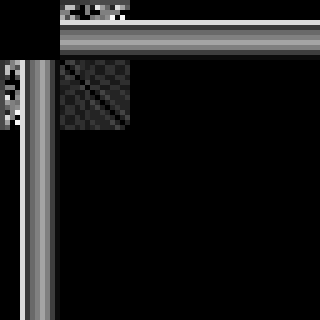

data/Zn8B8Pb4O24,volume=623,uid=bf5e.png


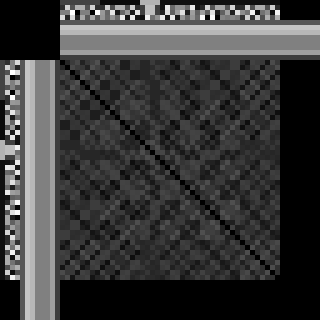

In [6]:
import glob, os
from PIL import Image
for fpath in glob.glob("data/*.png"):
    with Image.open(fpath) as im:
      im = im.resize((64*5, 64*5), Image.BOX)
      print(fpath)
      display(im)

As mentioned in the README, the legend key for these images is as follows:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src=https://user-images.githubusercontent.com/45469701/169937021-f6f60169-6965-4db1-9bbd-e8744521d570.png width=327>

Also described in the README, the match between the encoded and decoded versions is within an expected tolerance, given that PNG images are represented as discrete RGB values between 0 and 255 (i.e. there is a round-off error).

<table>
<tr>
<th> Original </th>
<th> Decoded </th>
</tr>
<tr>
<td>

```python
Structure Summary
Lattice
    abc : 5.033788 11.523021 10.74117
 angles : 90.0 90.0 90.0
 volume : 623.0356027127609
      A : 5.033788 0.0 3.082306e-16
      B : 1.853043e-15 11.523021 7.055815e-16
      C : 0.0 0.0 10.74117
PeriodicSite: Zn2+ (0.912, 5.770, 9.126) [0.181, 0.501, 0.850]
PeriodicSite: Zn2+ (4.122, 5.753, 1.616) [0.8188, 0.499, 0.150]
...
```

</td>
<td>

```python
Structure Summary
Lattice
    abc : 5.058824 11.529412 10.764706
 angles : 90.352941 90.352941 90.352941
 volume : 627.818381
      A : 5.058728 0.0 -0.031162
      B : -0.071459 11.528972 -0.071021
      C : 0.0 0.0 10.764706
PeriodicSite: Zn (0.877, 5.787, 9.119) [0.180, 0.502, 0.851]
PeriodicSite: Zn (4.111, 5.742, 1.543) [0.820, 0.498, 0.149]
...
```

</td>
</tr>
</table>

### Before/after Crystal Structure Visualization

To visualize the crystal structures before and after, we can use `nglview` after a bit of Colab finnagling with external ipywidgets.

In [7]:
from google.colab import output
output.enable_custom_widget_manager()

In [8]:
from pymatgen.io.ase import AseAtomsAdaptor
from ase.visualize import view
aaa = AseAtomsAdaptor()

In [9]:
[display(view(aaa.get_atoms(s), viewer='ngl')) for s in example_structures]

[None, None]

In [10]:
[display(view(aaa.get_atoms(s), viewer='ngl')) for s in decoded_structures]

[None, None]

Undo the Colab finnagling of external ipywidgets.

In [11]:
from google.colab import output
output.disable_custom_widget_manager()

## Final Remarks

This tool makes it possible to use state-of-the-art image-based machine learning models with minimal "plumbing" required. Just follow the normal instructions for custom image datasets. For example, this can be used with [Palette](https://iterative-refinement.github.io/palette/), an image-to-image guided diffusion model by Google, which has an unofficial implementation [here](https://github.com/Janspiry/Palette-Image-to-Image-Diffusion-Models).